# Recursive Feature Engineering and LDA

In [88]:
!pip install -r requirements.txt --quiet

In [89]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

## Load Dataset

In [90]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Fit on baseline model before any transformations

In [91]:
results = {}
baseline_model = XGBClassifier(use_label_encoder=False, 
                               eval_metric='logloss', 
                               random_state=42)

baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)
results['Baseline'] = [accuracy_score(y_test, y_pred_base), 
                       f1_score(y_test, y_pred_base)]

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Use LDA to reduce the complexity of the data

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [94]:
lda_model = XGBClassifier(use_label_encoder=False, 
                          eval_metric='logloss', 
                          random_state=42)
lda_model.fit(X_train_lda, y_train)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [95]:
y_pred_lda = lda_model.predict(X_test_lda)
results['LDA Only'] = [
    accuracy_score(y_test, y_pred_lda), 
    f1_score(y_test, y_pred_lda)]

## Recursive Feature Elimination

In [96]:
rfecv_model = XGBClassifier(use_label_encoder=False, 
                            eval_metric='logloss', 
                            random_state=42)

In [97]:
rfecv = RFECV(
    estimator=rfecv_model, 
    step=1, cv=5, 
    scoring='f1')

X_train_rfecv = rfecv.fit_transform(X_train, y_train)
X_test_rfecv = rfecv.transform(X_test)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:27:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.p

In [98]:
rfecv_model = XGBClassifier(use_label_encoder=False, 
                            eval_metric='logloss',
                            random_state=42)
rfecv_model.fit(X_train_rfecv, y_train)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [99]:
y_pred_rfecv = rfecv_model.predict(X_test_rfecv)
results['RFECV Only'] = [
    accuracy_score(y_test, y_pred_rfecv), 
    f1_score(y_test, y_pred_rfecv)]

### RFECV and LDA

In [100]:
scaler_rfecv = StandardScaler()
X_train_rfecv_scaled = scaler_rfecv.fit_transform(X_train_rfecv)
X_test_rfecv_scaled = scaler_rfecv.transform(X_test_rfecv)

lda_rfecv = LDA(n_components=1)
X_train_rfecv_lda = lda_rfecv.fit_transform(X_train_rfecv_scaled, y_train)
X_test_rfecv_lda = lda_rfecv.transform(X_test_rfecv_scaled)

rfecv_lda_model = XGBClassifier(use_label_encoder=False, 
                                eval_metric='logloss', 
                                randpom_state=42)

rfecv_lda_model.fit(X_train_rfecv_lda, y_train)
y_pred_rfecv_lda = rfecv_lda_model.predict(X_test_rfecv_lda)
results['RFECV + LDA'] = [accuracy_score(y_test, y_pred_rfecv_lda), 
                          f1_score(y_test, y_pred_rfecv_lda)]


c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "randpom_state", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### RFECV + LDA + RandomSearch

In [101]:
param_grid = {
    'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(3, 6),
    'learning_rate': np.linspace(0.05, 0.2, 5),
    'subsample': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_rfecv_lda, y_train)
best_model = random_search.best_estimator_
y_pred_final = best_model.predict(X_test_rfecv_lda)
results['RFECV + LDA + RS'] = [accuracy_score(y_test, y_pred_final), f1_score(y_test, y_pred_final)]

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Chi-Square

In [102]:
def feature_chi2_selection(X, y, k=5):
    X_non_neg = X - X.min()  
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X_non_neg, y)
    return X_new, selector

In [103]:
X_chi2_train, chi2_selector = feature_chi2_selection(X_train, 
                                                   y_train, 
                                                   k=5)
X_chi2_test = chi2_selector.transform(X_test - X_test.min())

In [104]:
chi2_only_model = XGBClassifier(use_label_encoder=False, 
                                eval_metric='logloss', random_state=42)
chi2_only_model.fit(X_chi2_train, y_train)
y_pred_chi2_only = chi2_only_model.predict(X_chi2_test)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [105]:
results['Chi2 Only'] = [accuracy_score(y_test, y_pred_chi2_only), 
                        f1_score(y_test, y_pred_chi2_only)]

## Chi-Square + RFECV

In [106]:
rfecv_chi2_model = XGBClassifier(use_label_encoder=False, 
                                eval_metric='logloss', 
                                random_state=42)
rfecv_chi2 = RFECV(estimator=rfecv_chi2_model, 
                    step=1, cv=5, scoring='f1')
X_train_chi2_rfecv = rfecv_chi2.fit_transform(X_chi2_train, y_train)
X_test_chi2_rfecv = rfecv_chi2.transform(X_chi2_test)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.p

In [107]:
rfecv_chi2_model.fit(X_train_chi2_rfecv, y_train)
y_pred_chi2_rfecv = rfecv_chi2_model.predict(X_test_chi2_rfecv)

c:\Users\gazgl\AppData\Local\anaconda3\envs\sklearn-book-py-12-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:28:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [108]:
results['Chi2 + RFECV'] = [accuracy_score(y_test, y_pred_chi2_rfecv), 
                           f1_score(y_test, y_pred_chi2_rfecv)]

## Evaluate and Compare Methods

In [109]:
comparison_df = pd.DataFrame(results, 
                             index=['Accuracy', 'F1 Score']).T
print(comparison_df.head())

                  Accuracy  F1 Score
Baseline          0.956140  0.965035
LDA Only          0.938596  0.948905
RFECV Only        0.956140  0.965035
RFECV + LDA       0.947368  0.956522
RFECV + LDA + RS  0.964912  0.971831


In [110]:
comparison_df_reset = comparison_df.reset_index().rename(
    columns={'index': 'Method'})
comparison_df_reset

,Method,Accuracy,F1 Score
0,Baseline,0.956140,0.965035
1,LDA Only,0.938596,0.948905
2,RFECV Only,0.956140,0.965035
3,RFECV + LDA,0.947368,0.956522
4,RFECV + LDA + RS,0.964912,0.971831
5,Chi2 Only,0.956140,0.965035
6,Chi2 + RFECV,0.938596,0.950355


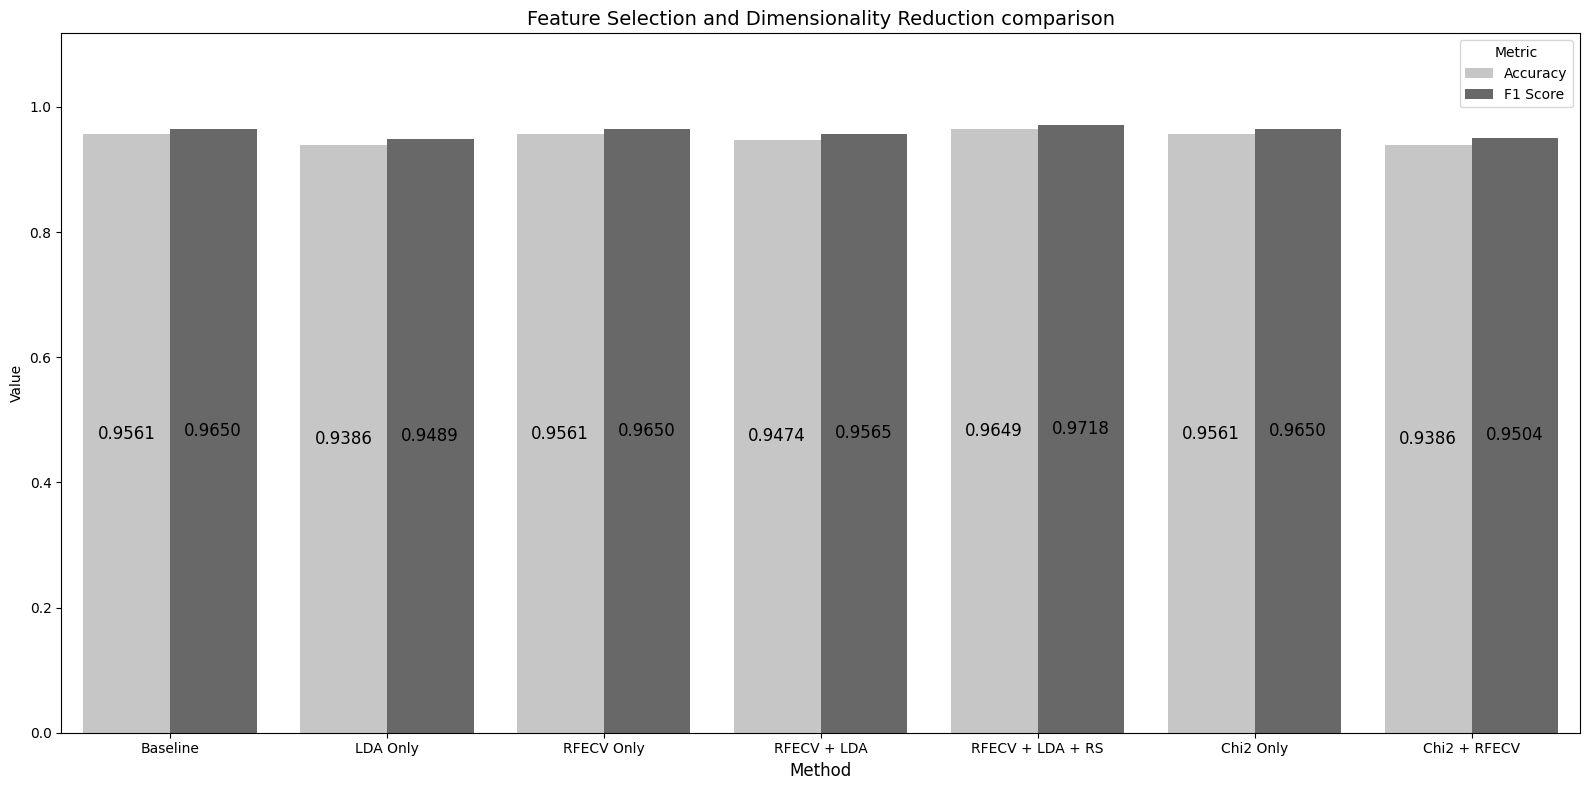

In [111]:
from hyperparameter.visualize import plot_hp_comparison
plot_hp_comparison(comparison_df_reset, 
                   ['Accuracy', 'F1 Score'], 
                   figsize=(16, 8), 
                   x_label_rotation=None,
                   label_fontsize=12,
                   label_position='center',
                   palette='Greys',
                   title='Feature Selection and Dimensionality Reduction comparison')
